# Questions to ask:


### 1) Players usage rate relate to number of points scored?
### 2) How often does the player switch teams during drafting?
### 3) Which college produces the best players?
### 4) Which team drafts the best players?
### 5) Which team performs the best and for which seasons?
### 6) Does the BMI of the players affect their points? Height?
### 7) The age where the players perform the best on average?
### 8) The average age among players?
### 9) Is draft round == how good the players perform on the court?
### 10) How often does the player get to play? 
### 11) Which season has the most number of points scored?





# 














# ANALYZING NBA STATS

In [1]:
# Basic Libraries
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from IPython.display import display_html 
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

In [2]:
nbaData = pd.read_csv('all_seasons.csv')
#nbaData = nbaData.drop_duplicates(subset='player_name',keep='first') 
nbaData.head()

## Basically removed duplicates 

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Travis Knight,LAL,22.0,213.36,106.59412,Connecticut,USA,1996,1,...,4.8,4.5,0.5,6.2,0.127,0.182,0.142,0.536,0.052,1996-97
1,1,Matt Fish,MIA,27.0,210.82,106.59412,North Carolina-Wilmington,USA,1992,2,...,0.3,0.8,0.0,-15.1,0.143,0.267,0.265,0.333,0.000,1996-97
2,2,Matt Bullard,HOU,30.0,208.28,106.59412,Iowa,USA,Undrafted,Undrafted,...,4.5,1.6,0.9,0.9,0.016,0.115,0.151,0.535,0.099,1996-97
3,3,Marty Conlon,BOS,29.0,210.82,111.13004,Providence,USA,Undrafted,Undrafted,...,7.8,4.4,1.4,-9.0,0.083,0.152,0.167,0.542,0.101,1996-97
4,4,Martin Muursepp,DAL,22.0,205.74,106.59412,None,USA,1996,1,...,3.7,1.6,0.5,-14.5,0.109,0.118,0.233,0.482,0.114,1996-97


In [3]:
nbaData.describe()

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000,11700.000000
mean,5849.500000,27.131966,200.728501,100.526791,51.717179,8.169299,3.564957,1.811179,-2.166410,0.054981,0.141534,0.185380,0.510402,0.131228
std,3377.643409,4.340006,9.169827,12.526481,24.985236,5.956115,2.487498,1.792117,12.076914,0.043595,0.062793,0.052957,0.098306,0.094244
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2924.750000,24.000000,193.040000,90.718400,32.000000,3.600000,1.800000,0.600000,-6.300000,0.021000,0.096000,0.150000,0.479000,0.065000
50%,5849.500000,26.000000,200.660000,99.790240,58.000000,6.700000,3.000000,1.200000,-1.300000,0.042000,0.132000,0.182000,0.523000,0.103000
75%,8774.250000,30.000000,208.280000,108.862080,74.000000,11.500000,4.700000,2.400000,3.200000,0.084000,0.180000,0.218000,0.559000,0.178000
max,11699.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [4]:
#player names
print("Players: ", len(nbaData["player_name"].unique()))
print(nbaData["player_name"].value_counts())

Players:  2333
Vince Carter      22
Dirk Nowitzki     21
Kobe Bryant       20
Kevin Garnett     20
Jamal Crawford    20
                  ..
Gian Clavell       1
Tito Maddox        1
DeQuan Jones       1
Adonis Jordan      1
Mason Jones        1
Name: player_name, Length: 2333, dtype: int64


# Best and worst players per season

### Perhaps try to find a player at his peak and the same player at his worst. Can only be done for different seasons though.

# PTS refer to PPG

In [5]:
season = nbaData[nbaData['season']=='2005-06']
#season.head()

In [6]:
bestScorer = pd.DataFrame(nbaData.iloc[season['pts'].idxmax()])
worstScorer = pd.DataFrame(nbaData.iloc[season['pts'].idxmin()])

In [7]:
df1 = bestScorer
df2 = worstScorer

df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:200px;margin-left:150px;'")
df2_style = df2.style.set_table_attributes("style='display:inline;'")
print("------------------------------------------------------ Season " +season.iloc[0]['season'] + " ------------------------------------------------------")
print("")
print("                            Best Scorer                                           Worst Scorer")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)

------------------------------------------------------ Season 2005-06 ------------------------------------------------------

                            Best Scorer                                           Worst Scorer


,4348
Unnamed: 0,4348
player_name,Kobe Bryant
team_abbreviation,LAL
age,27.000000
player_height,198.120000
player_weight,99.790240
college,None
country,USA
draft_year,1996
draft_round,1


In [8]:
pts = pd.DataFrame(season['pts'])

------------------------------------------------------ Season 2005-06 ------------------------------------------------------


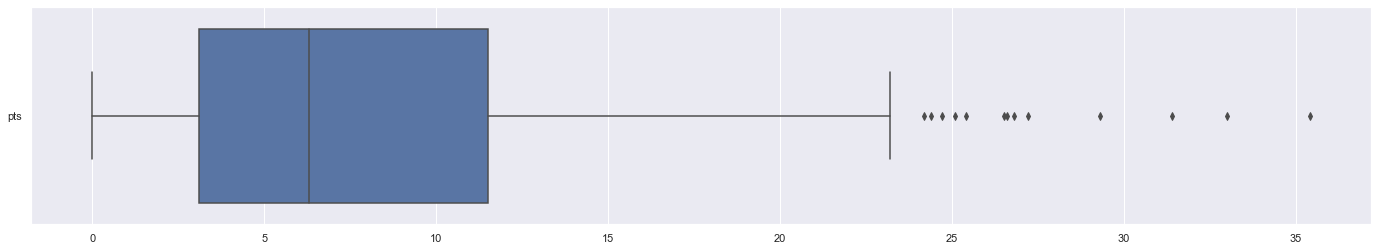

In [9]:
f = plt.figure(figsize=(24, 4))
sb.boxplot(data = pts, orient = "h")

# finding the 1st quartile
Q1 = np.quantile(pts, 0.25)
 
# finding the 3rd quartile
Q3 = np.quantile(pts, 0.75)
med = np.median(pts)
 
# finding the iqr region
IQR = Q3-Q1
 
# finding upper and lower whiskers
upper_bound = Q3+(1.5*IQR)
lower_bound = Q1-(1.5*IQR)
outliers=((pts < (Q1 - 1.5 * IQR)) | (pts > (Q3 + 1.5 * IQR))).sum()
print("------------------------------------------------------ Season " +season.iloc[0]['season'] + " ------------------------------------------------------")

# Teams

Number of teams: 36
CLE    411
TOR    408
LAC    408
MIA    405
HOU    402
DAL    401
PHI    401
ATL    400
WAS    399
SAS    395
GSW    393
DEN    392
LAL    390
MIL    390
ORL    390
IND    390
NYK    389
CHI    386
BOS    385
POR    383
MIN    382
SAC    378
PHX    377
UTA    377
DET    375
MEM    330
CHA    271
NJN    257
OKC    213
SEA    182
BKN    163
NOH    143
NOP    141
CHH     89
VAN     72
NOK     32
Name: team_abbreviation, dtype: int64


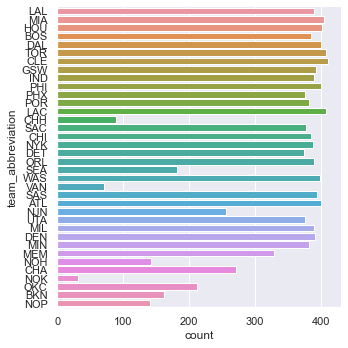

In [10]:
# Generations in the Dataset
print("Number of teams:", len(nbaData["team_abbreviation"].unique()))

# Pokemons in each Generation
print(nbaData["team_abbreviation"].value_counts())
sb.catplot(y = "team_abbreviation", data = nbaData, kind = "count")

In [11]:
# find relationship with players and usage rate etc?

In [12]:
# find relation with age and team?

In [13]:
team_abbreviation = pd.DataFrame(nbaData['team_abbreviation'])
age= pd.DataFrame(nbaData['team_abbreviation'])

In [14]:
#find players from which country?

### Age affect stats?

#### Try extracting from different age groups, 18, 20, 25, 30 ,35 ,40
#### Choose variables that are positive in nature, pts, net_rating
### Predicting age with stats 

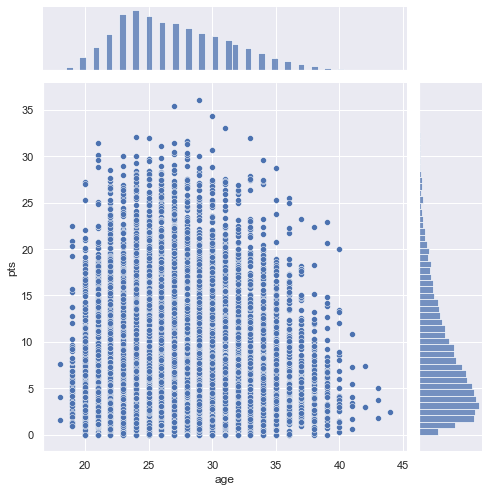

In [15]:
sb.jointplot(data = nbaData, x = "age", y = "pts", height = 7)

### Predict age and usg_pct

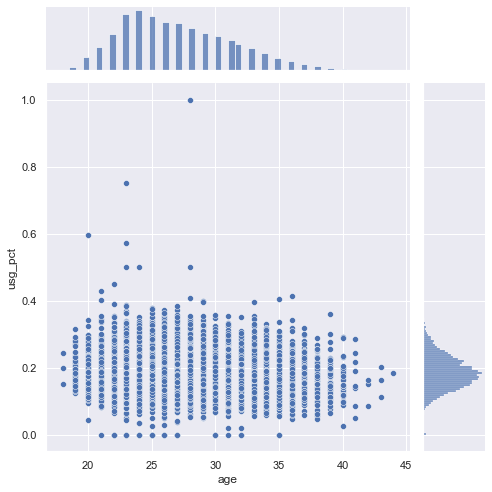

In [16]:
sb.jointplot(data = nbaData, x = "age", y = "usg_pct", height = 7)

### Predict age and gamesplayed

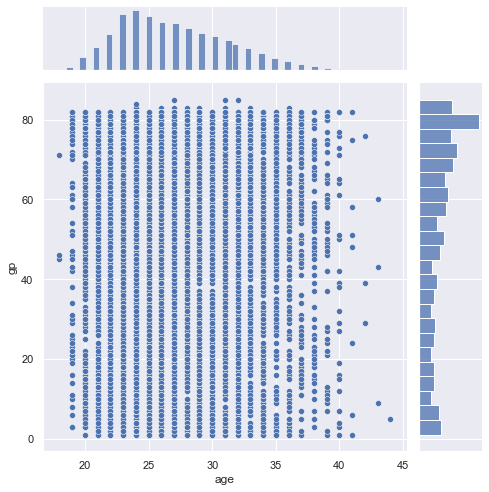

In [17]:
sb.jointplot(data = nbaData, x = "age", y = "gp", height = 7)

# Seems like ages doesnt seem to be a factor in the players stats, any data that is compared with age is discrete, what does it mean? 

# Issue is filtering repeated names from the dataset, need to clean them so to not skew the data  too much

# Once filtered the names, can analyze a person stats based on each season as each season is every year, their age goes up as well, see if by filtering it this way, can view their performance wrt to age

# Let us try to predict using pts against all other stats

### Predicts pts and ast_pct

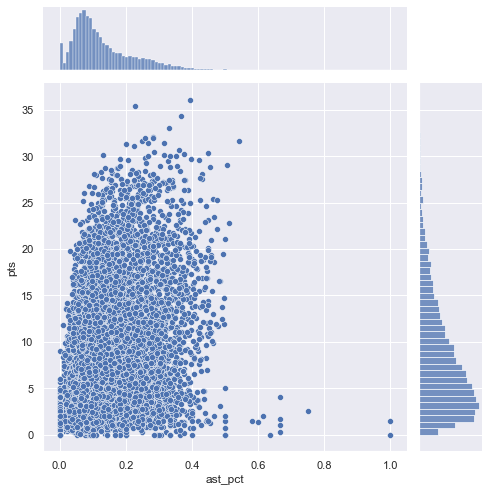

In [18]:
sb.jointplot(data = nbaData, x = "ast_pct", y = "pts", height = 7)

### Pts against games played

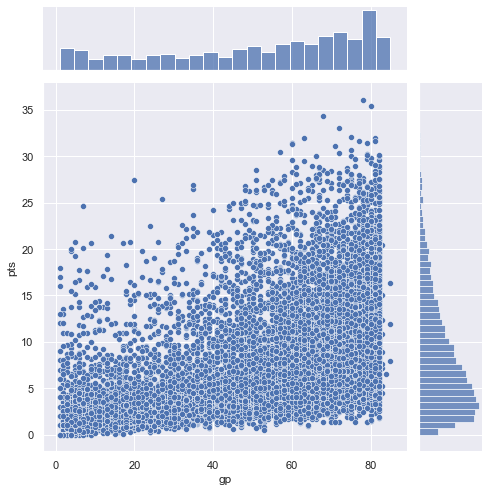

In [19]:
sb.jointplot(data = nbaData, x = "gp", y = "pts", height = 7)

### Pts agaisnt reb

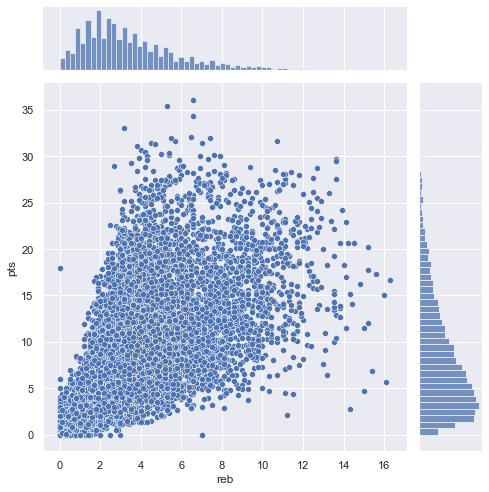

In [20]:
sb.jointplot(data = nbaData, x = "reb", y = "pts", height = 7)

### Pts against usg_pct

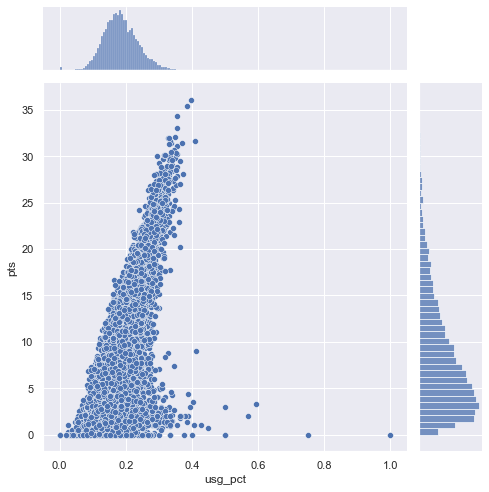

In [21]:
sb.jointplot(data = nbaData, x = "usg_pct", y = "pts", height = 7)

### Pts against assists

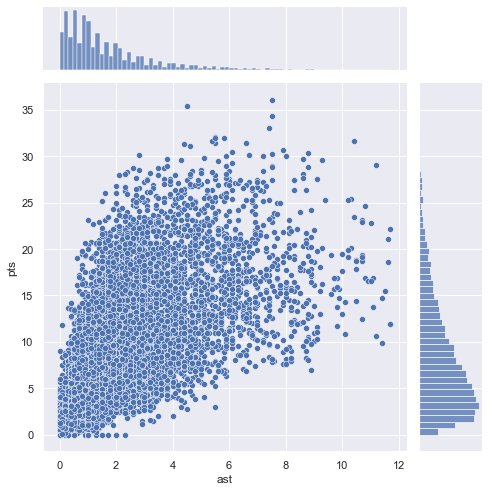

In [22]:
sb.jointplot(data = nbaData, x = "ast", y = "pts", height = 7)

### Predict pts and true shooting pct

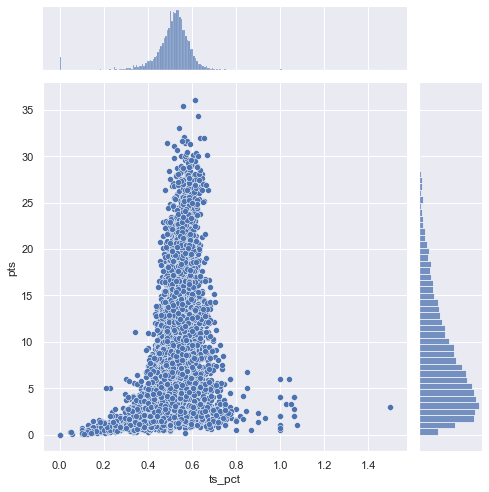

In [23]:
sb.jointplot(data = nbaData, x = "ts_pct", y = "pts", height = 7)